In [1]:
#!conda install -y graphviz  #Installed

In [2]:
#!conda install python-graphviz   #Installed

Solving environment: ...working... done

# All requested packages already installed.



# load the csv file. Do basic check. shape, na values, types of columns, information, plot basic histogram and bar plot

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report

In [2]:
# load dataset
pima = pd.read_csv("diabetes_csv.csv")

In [3]:
pima.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
#split dataset in features and target variable
#feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure', 
#                'SkinThickness', 'DiabetesPedigreeFunction']
X = pima.drop(["class"], axis=1) # Features
y = pima["class"] # Target variable

In [5]:
pima.shape

(768, 9)

In [6]:
y.value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [7]:
y.value_counts()/pima.shape[0]*100

tested_negative    65.104167
tested_positive    34.895833
Name: class, dtype: float64

In [8]:
X.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, stratify=None)# 70% training and 30% test

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


In [12]:
y_pred_train = clf.predict(X_train)

In [13]:
print("Train Accuracy:",metrics.accuracy_score(y_pred_train, y_train))

Train Accuracy: 1.0


In [14]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

tested_negative       0.74      0.80      0.76       147
tested_positive       0.58      0.50      0.54        84

       accuracy                           0.69       231
      macro avg       0.66      0.65      0.65       231
   weighted avg       0.68      0.69      0.68       231



In [15]:
y_test.value_counts()

tested_negative    147
tested_positive     84
Name: class, dtype: int64

In [16]:
y_train.value_counts()

tested_negative    353
tested_positive    184
Name: class, dtype: int64

In [17]:
y.value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [25]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

C:\Users\pkmb\AppData\Local\Continuum\anaconda3_1\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [1]:
#import pydotplus

In [22]:
350/ (350 + 187)

0.6517690875232774

In [25]:
500/ (500 + 268)

0.6510416666666666

In [4]:
from io import StringIO

In [5]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['tested_positive','tested_negative'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

NameError: name 'export_graphviz' is not defined

In [6]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7056277056277056


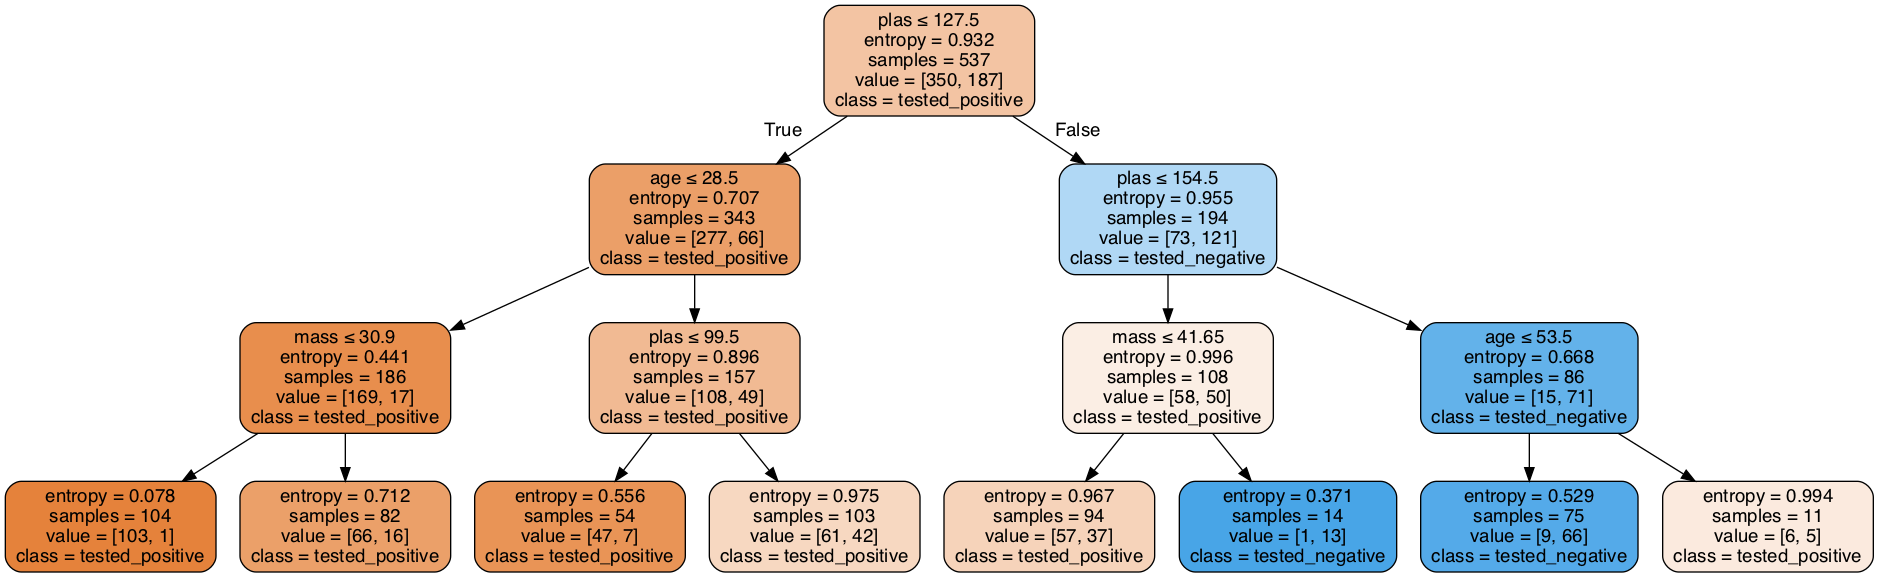

In [86]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,
                class_names=['tested_positive','tested_negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [20]:
#Randon Forest
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(n_estimators=170)
clf_random_forest.fit(X_train, y_train)
y_pred = clf_random_forest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7489177489177489


In [21]:
# Support Vector Machine
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6363636363636364


C:\Users\pkmb\AppData\Local\Continuum\anaconda3_1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1) # 70% training and 30% test
from sklearn.svm import SVC
clf_svm = SVC(C=5)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


C:\Users\pkmb\AppData\Local\Continuum\anaconda3_1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
X_train

array([[ 3.31264542,  0.47275805,  0.04624525, ...,  0.64823013,
        -0.96304428,  0.83038113],
       [-1.14185152, -0.74783062, -0.26394125, ...,  0.61015436,
         0.38694877, -0.70119842],
       [-0.84488505, -0.15318486,  0.04624525, ..., -0.58288655,
        -0.80901822, -1.04154944],
       ...,
       [ 2.7187125 ,  0.1597866 ,  1.08020025, ...,  1.44782138,
         0.33560676,  0.74529338],
       [ 0.04601433,  1.56815814,  0.14964075, ...,  1.47320522,
         0.02151441, -0.61611067],
       [ 1.53084665, -0.59134489,  0.35643175, ...,  0.1151693 ,
         0.58325649,  1.08564439]])

In [24]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression()
clf_logistic = clf_logistic.fit(X_train, y_train)
y_pred = clf_logistic.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


C:\Users\pkmb\AppData\Local\Continuum\anaconda3_1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013
